Mean Squared Error: 1210349.6240551611
R2 Score: 0.5678856047927665


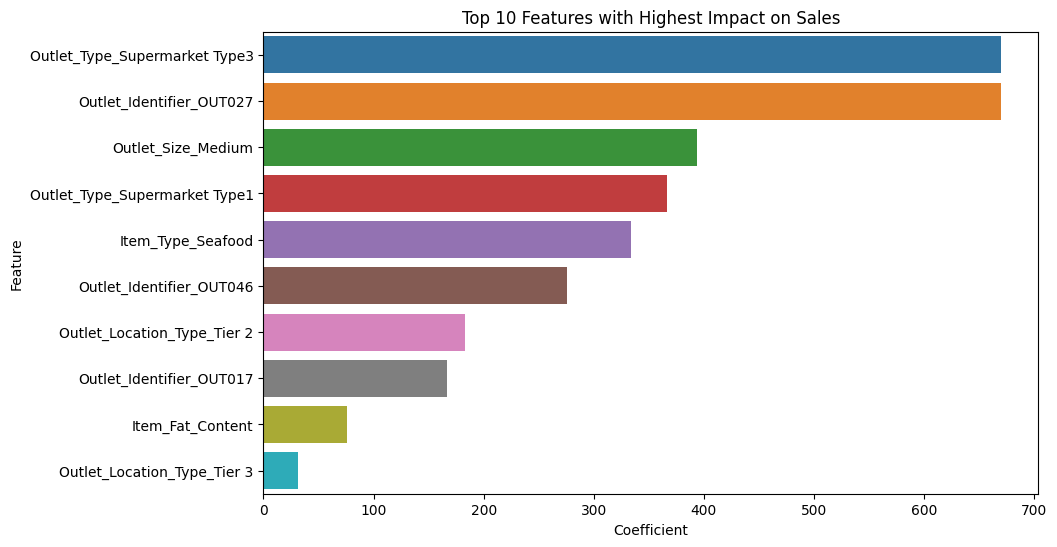

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('bigmart_train.csv')

# Preprocess the data
# Impute missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna('Unknown', inplace=True)

# Encode categorical variables
data['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0}, inplace=True)
data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

# Split the data into training and testing sets
X = data.drop(['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Develop a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Use the model to forecast sales
forecast = model.predict(X)

# Optimize inventory management
data['Forecasted_Sales'] = forecast
data['Deviation'] = data['Item_Outlet_Sales'] - data['Forecasted_Sales']
data['Inventory_Status'] = np.where(data['Deviation'] > 0, 'Excess Stock', np.where(data['Deviation'] < 0, 'Out of Stock', 'Optimal'))

# Visualize the products and stores with the highest impact on increasing sales
coef = pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['Feature', 'Coefficient'])
coef = coef.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef.head(10))
plt.title('Top 10 Features with Highest Impact on Sales')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Save the inventory status to a CSV file
data.to_csv('Inventory_Status.csv')